In [1]:
import pandas as pd
df = pd.read_csv('bigcontest.csv')

In [2]:
df.head()

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
0,50.0,F,골드,무료,그린,NaN,NaN,NaN,20220114,1512,...,2,일반,302,20220114.0,20220115.0,교향곡,콘서트홀,120,15,Y
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211003,1550,...,0,초대권,1120,NaN,20210823.0,독주,리사이틀홀,90,15,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220917,1520,...,0,초대권,2283,20220911.0,20220911.0,독주,IBK챔버홀,80,15,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190630,1132,...,0,초대권,2798,NaN,20190701.0,독주,리사이틀홀,90,15,N
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y


In [3]:
df.columns

Index(['age', 'gender', 'membership_type_1', 'membership_type_2',
       'membership_type_3', 'membership_type_4', 'membership_type_5',
       'membership_type_6', 'tran_date', 'tran_time', 'play_date',
       'play_st_time', 'seat', 'price', 'ticket_cancel', 'discount_type',
       'performance_code', 'pre_open_date', 'open_date', 'genre', 'place',
       'running_time', 'intermission', 'member_yn'],
      dtype='object')

## 질문
- 성준
  - 시간대별 가격, 관객수, 공연수
  - 인기 장르 , 장르별 가격
  - 연, 월 공연수, 관객수, 가격
  - 코로나
 
- 순범
  - 나이대 price, 멤버십
  - 초대권 vs 유료
  - 멤버십  유무
  - 인기있는 공연 특징
  - 선예매 자리

### 질문1 - 나이대 price, 멤버십

#### 관객수, 가격

In [4]:
import numpy as np
df['price'] = df['price'].replace(0,np.nan)
df['price']

0           10000.0
1               NaN
2               NaN
3               NaN
4          180000.0
             ...   
1920863         NaN
1920864     21000.0
1920865     24000.0
1920866         NaN
1920867         NaN
Name: price, Length: 1920868, dtype: float64

In [38]:
cthall = df[df['place']=='콘서트홀']
cthall = cthall[cthall['ticket_cancel']==0]

In [43]:
df_age_cnt = cthall.groupby('age',as_index=False).agg({'price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=False)
df_age_cnt.reset_index(drop=True,inplace=True)
df_age_cnt['age'] = df_age_cnt['age'].astype('str')

In [44]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_cnt['age'], y=df_age_cnt['seat'], text=df_age_cnt['seat'], textposition='auto'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Customer_Count</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Count",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white'
    }
)


In [45]:
df_age_cnt = df_age_cnt.sort_values('price',ascending=False)
df_age_cnt['price'] = df_age_cnt['price'].astype('int')

In [46]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_cnt['age'], y=df_age_cnt['price'], text=df_age_cnt['price'], textposition='auto'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Price_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":900,
        "height":500
    }
)


In [47]:
df_age_cnt = cthall.groupby('age',as_index=False).agg({'price':'sum',
                                         'seat':'count'}).sort_values('seat',ascending=False)
df_age_cnt.reset_index(drop=True,inplace=True)
df_age_cnt['age'] = df_age_cnt['age'].astype('str')

In [48]:
df_age_cnt

,age,price,seat
0,50.0,4413163000.0,68895
1,40.0,4344428000.0,64192
2,30.0,3528496000.0,50257
3,60.0,2817673000.0,48490
4,20.0,1862898000.0,38024
5,70.0,750475000.0,14035
6,80.0,213682000.0,3306
7,10.0,135496000.0,2499


In [30]:
pd.options.display.float_format = '{:.1f}'.format

In [35]:
df_age_cnt = df_age_cnt.sort_values('price',ascending=False)
# df_age_cnt['price'] = df_age_cnt['price'].astype('int')

In [49]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_cnt['age'], y=df_age_cnt['price'], text=df_age_cnt['price'], textposition='auto'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Price_Sum</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":900,
        "height":500
    }
)


In [63]:
df_gender_cnt = cthall.groupby('gender',as_index=False).agg({'price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=False)
df_gender_cnt

,gender,price,seat
0,F,64885.7,182178
1,M,58061.3,107833


In [12]:
import pandas as pd

# 원그래프
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
	go.Pie(
		labels=df_gender_cnt['gender'], values=df_gender_cnt['seat'],hole=.4,textinfo='label+percent',textfont_size=20
	)
)


fig.update_layout(
    {
        "title": {
            "text": "The rate of Customer Count",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 18
            }
        },
        "showlegend": False,
        "autosize":False,
        "width":500,
        "height":500
    },


fig.update_layout(
    annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=20, showarrow=False)],
)
)
fig.show()

In [64]:
pd.options.display.float_format = '{:.1f}'.format
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_gender_cnt['gender'], y=df_gender_cnt['price'], text=df_gender_cnt['price'], textposition='auto'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Price_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":500,
        "height":500
    }
)


In [56]:
df_gender_cnt = cthall.groupby('gender',as_index=False).agg({'price':'sum',
                                         'seat':'count'}).sort_values('price',ascending=False)
df_gender_cnt

,gender,price,seat
0,F,11820687000.0,182178
1,M,6260805000.0,107833


In [59]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_gender_cnt['gender'], y=df_gender_cnt['price'], text=df_gender_cnt['price'], textposition='auto'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Price_Sum</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Age",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Price",
            "tickfont": {
                "size": 10                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":500,
        "height":500
    }
)


In [58]:
df_age_gender_coount = cthall.groupby(['age','gender'],as_index=False).agg({'price':'mean',
                                         'seat':'count'}).sort_values('seat',ascending=True)
df_age_gender_coount['age_gender'] = df_age_gender_coount['age'].astype('str') + df_age_gender_coount['gender']

In [14]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['seat'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['seat'], textposition='auto',orientation='h'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Customer_Count</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Count",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


In [60]:
df_age_gender_coount = df_age_gender_coount.sort_values('price',ascending=True)

In [61]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['price'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['price'], textposition='auto',orientation='h'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Prcie_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Count",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


In [65]:
df_age_gender_coount = cthall.groupby(['age','gender'],as_index=False).agg({'price':'sum',
                                         'seat':'count'}).sort_values('price',ascending=True)
df_age_gender_coount['age_gender'] = df_age_gender_coount['age'].astype('str') + df_age_gender_coount['gender']

In [66]:
# 데이터프레임 생성
import numpy as np
import pandas as pd
# df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])

#막대그래프 그리기
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=df_age_gender_coount['price'], y=df_age_gender_coount['age_gender'], text=df_age_gender_coount['price'], textposition='auto',orientation='h'
    )
)
fig.update_layout(
    {
        "title": {
            "text": "<b>Age_Gender_Prcie_Mean</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 15
            }
        },
        "xaxis": {
            "title": "Count",
            # "showticklabels":True,
            # "tick0": "2017-01-31",
            # "dtick": "M1",
            "tickfont": {
                "size": 15               
            }
        },
        "yaxis": {
            "title": "Age_gender",
            "tickfont": {
                "size": 15                
            }
        },
        "template":'plotly_white',
        "showlegend": False,
        "autosize":False,
        "width":1000,
        "height":700
    }
)


### 질문2 - 초대권 vs 유료

In [67]:
cthall

,age,gender,membership_type_1,membership_type_2,membership_type_3,membership_type_4,membership_type_5,membership_type_6,tran_date,tran_time,...,ticket_cancel,discount_type,performance_code,pre_open_date,open_date,genre,place,running_time,intermission,member_yn
4,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20220206,1615,...,0,일반,897,20220109.0,20220110.0,독주,콘서트홀,90,0,Y
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20191020,1459,...,0,초대권,44,NaN,20191023.0,교향곡,콘서트홀,100,15,N
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190613,954,...,0,초대권,827,20190602.0,20190602.0,교향곡,콘서트홀,120,20,N
9,NaN,F,블루,무료,NaN,NaN,NaN,NaN,20190703,908,...,0,일반,1528,NaN,20190413.0,클래식,콘서트홀,100,15,N
11,50.0,F,무료,NaN,NaN,NaN,NaN,NaN,20191005,1417,...,0,K-lang 멤버십 회원(1인2매)20%,315,NaN,20191005.0,오페라,콘서트홀,120,15,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20190503,1659,...,0,초대권,2253,20190519.0,20190519.0,클래식,콘서트홀,120,15,N
1920855,50.0,M,무료,NaN,NaN,NaN,NaN,NaN,20230522,1729,...,0,일반,2825,20230505.0,20230507.0,교향곡,콘서트홀,120,15,Y
1920856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201009,1652,...,0,초대권,77,NaN,20200920.0,클래식,콘서트홀,120,15,N
1920858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200726,1655,...,0,기획사판매,850,20200719.0,20200720.0,합창,콘서트홀,110,15,N


In [78]:
cthall['floor'] = cthall['seat'].str.split(' ').str[0]
cthall['zone'] = cthall['seat'].str.split(' ').str[1].str[:3]
cthall['col'] = cthall['seat'].str.split(' ').str[1].str[3:]
cthall['floor_zone'] = cthall['floor'] + cthall['zone']

In [79]:
cthall_free = cthall[cthall['discount_type']=='초대권']
cthall_paid = cthall[cthall['discount_type']!='초대권']

In [69]:
cthall_free.groupby('genre',as_index=False).seat.count()

,genre,seat
0,가족극,39
1,교향곡,167539
2,기타,4878
3,독주,5574
4,복합장르,2249
5,성악,9464
6,실내악,13349
7,오페라,9014
8,재즈,57
9,콘서트,11696


In [71]:
# 한글
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

<Axes: xlabel='genre', ylabel='count'>

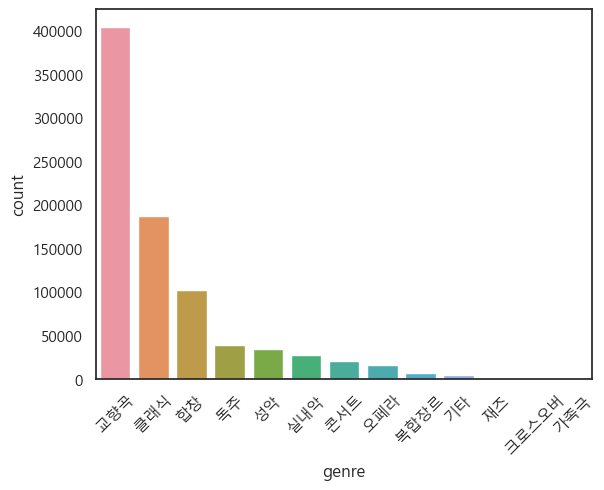

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.countplot(x='genre',data=cthall,order=cthall['genre'].value_counts().index)

<Axes: xlabel='genre', ylabel='count'>

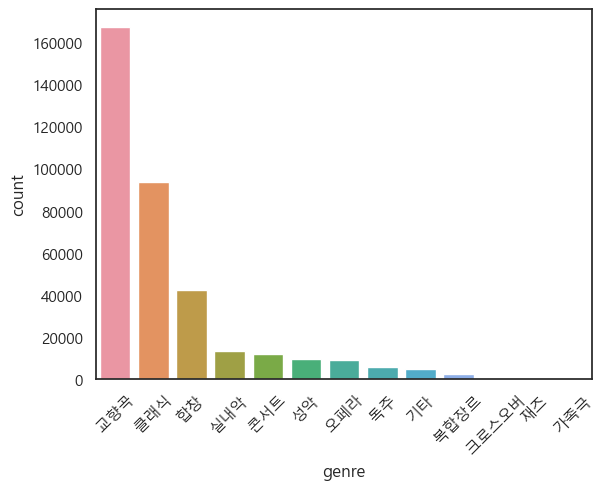

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.countplot(x='genre',data=cthall_free,order=cthall_free['genre'].value_counts().index)

<Axes: xlabel='genre', ylabel='count'>

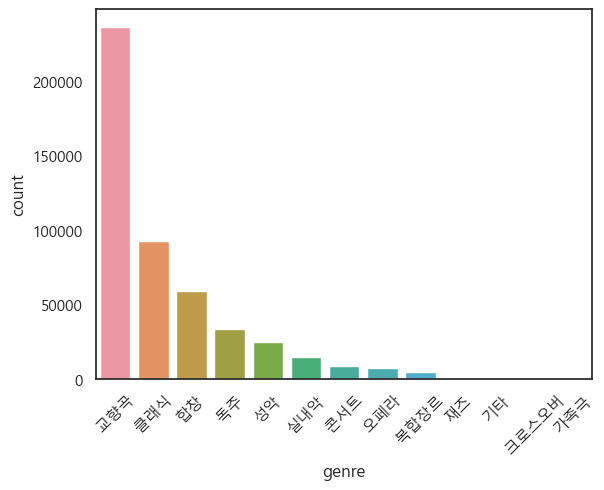

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.countplot(x='genre',data=cthall_paid,order=cthall_paid['genre'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

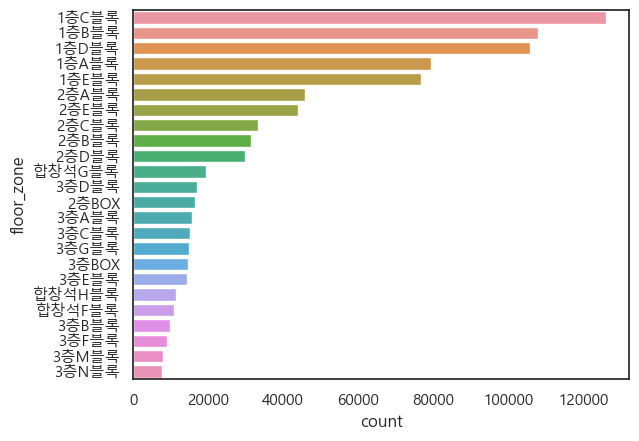

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.xticks(rotation=45)
sns.countplot(y='floor_zone',data=cthall,order=cthall['floor_zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

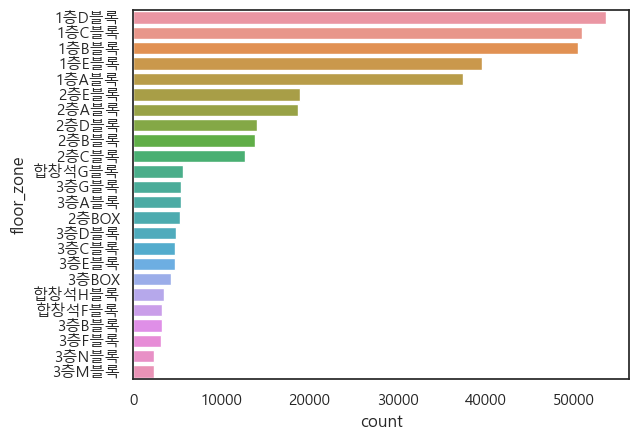

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.xticks(rotation=45)
sns.countplot(y='floor_zone',data=cthall_free,order=cthall_free['floor_zone'].value_counts().index)

<Axes: xlabel='count', ylabel='floor_zone'>

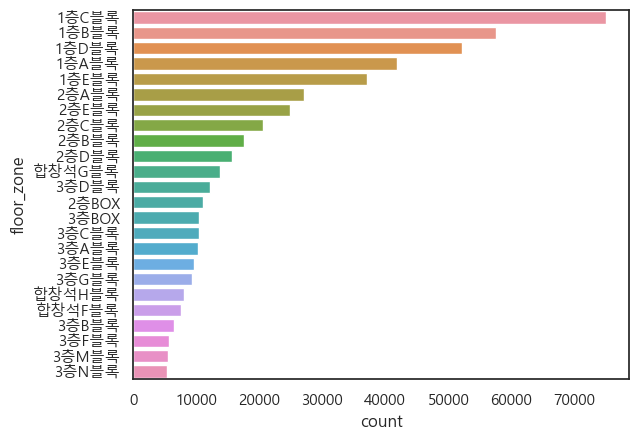

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.xticks(rotation=45)
sns.countplot(y='floor_zone',data=cthall_paid,order=cthall_paid['floor_zone'].value_counts().index)

### 질문3 - 인기있는 공연 특징

In [98]:
cthall['price_sum'] = cthall['price']
cthall_popularity = cthall.groupby(['performance_code','play_date'],as_index=False).agg({'seat': 'count',
                                                      'price':'mean',
                                                      'price_sum':'sum'})
cthall_popularity = cthall_popularity[cthall_popularity['seat']<=2505]

In [102]:
cthall_popularity = cthall_popularity[cthall_popularity['seat']>=2400]
cthall_popularity.sort_values('seat',ascending=False)

,performance_code,play_date,seat,price,price_sum
15,44,20191109,2505,NaN,0.0
75,197,20230114,2505,NaN,0.0
710,2824,20230608,2498,31845.8,65252000.0
455,1496,20221206,2481,NaN,0.0
578,2253,20190523,2481,NaN,0.0
453,1496,20190322,2481,NaN,0.0
454,1496,20191003,2481,NaN,0.0
575,2230,20230101,2481,NaN,0.0
576,2231,20230510,2481,NaN,0.0
667,2641,20190326,2480,30000.0,30000.0
